## Exploratory Data Analysis

In [28]:
import pandas as pd

# import dataset
total_data = pd.read_csv("../data/raw/insurance_data.csv")

### 1. Exploration and data cleaning

We'll try to understand the data and its main features.

In [29]:
# Obtain the dimensions of the dataset
total_data.shape

(1338, 7)

In [30]:
# Obtain information about data types and non-null values
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Seems like we don't have any nulls in our data. There seem to be 3 categorical variables and 4 numerical ones. Since there is no way to uniquely identify a customer, we'll omit searching for duplicates.

Initially, all the columns seem to have relevant information for the value we're trying to predict.

### 2. Analysis of univariate variables
#### 2.1 Analysis on categorical variables
Let's plot the categorical variables in our dataset and see what they can show us.

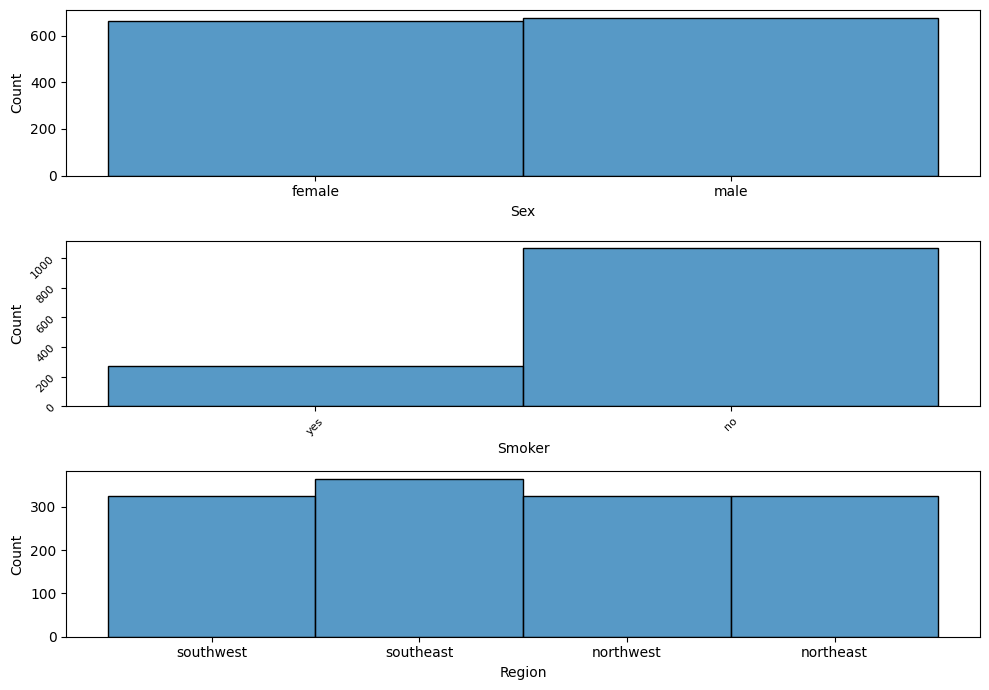

In [31]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axs = plt.subplots(3, figsize = (10, 7))

# Create a multiple histogram
sns.histplot(ax = axs[0], data = total_data, x = "sex").set(xlabel = 'Sex')
sns.histplot(ax = axs[1], data = total_data, x = "smoker").set(xlabel = 'Smoker')
sns.histplot(ax = axs[2], data = total_data, x = "region").set(xlabel = 'Region')
axs[1].tick_params(labelrotation=45, labelsize=8)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Seems the majority of customers are non-smokers. The variables sex and region seem to be more or less evenly distributed.

#### 3.2 Analysis on numerical variables
Now let's plot the numerical variables. For this part lets focus on the columns that have a numeric data type in the dataframe.

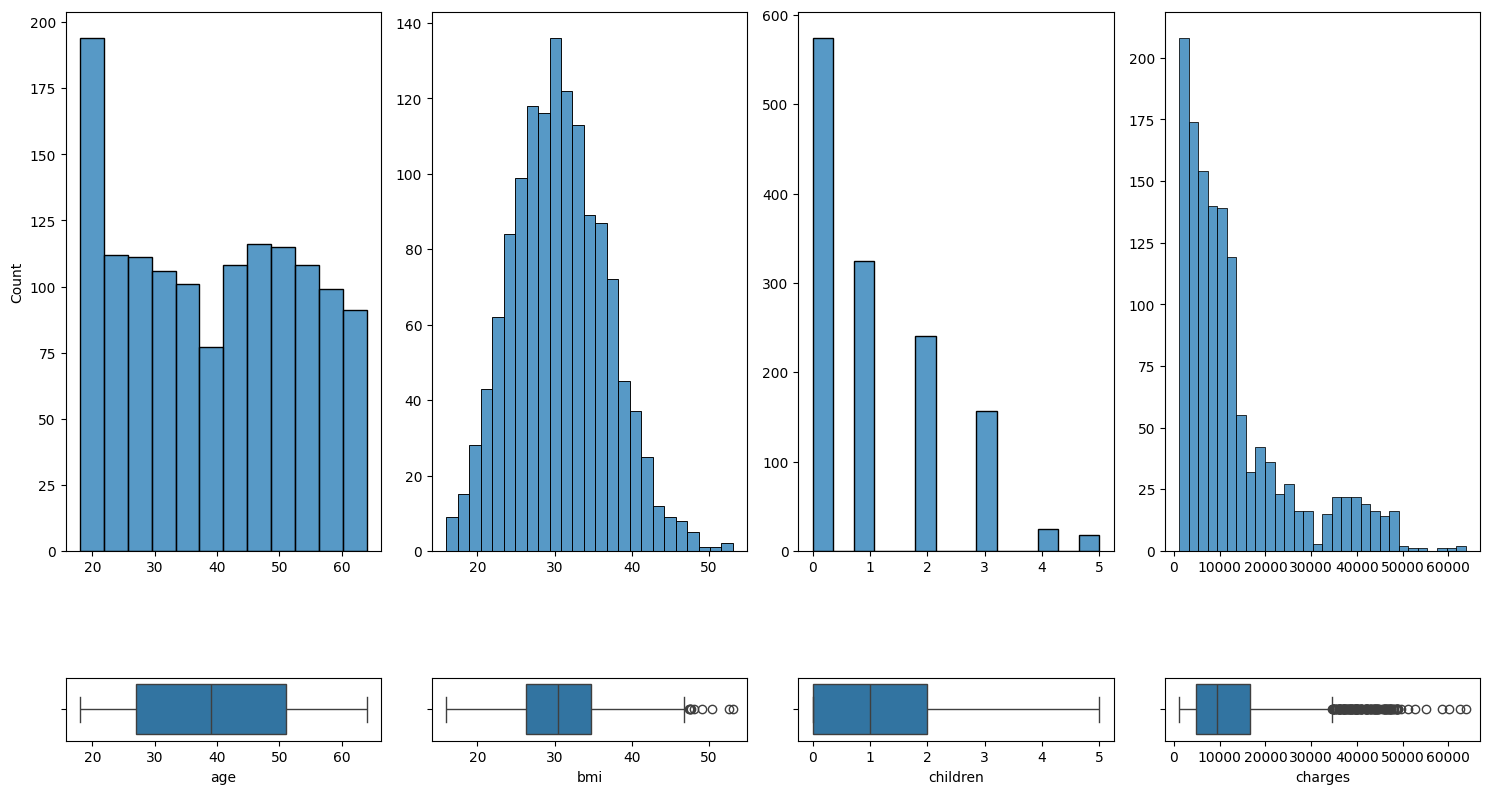

In [32]:
#total_data.info()

fig, axs = plt.subplots(2, 4, figsize = (15, 10))

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axs[0, 0], data = total_data, x = "age").set(xlabel = None)
sns.boxplot(ax = axs[1, 0], data = total_data, x = "age").set_box_aspect(0.2)

sns.histplot(ax = axs[0, 1], data = total_data, x = "bmi").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axs[1, 1], data = total_data, x = "bmi").set_box_aspect(0.2)

sns.histplot(ax = axs[0, 2], data = total_data, x = "children").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axs[1, 2], data = total_data, x = "children").set_box_aspect(0.2)

sns.histplot(ax = axs[0, 3], data = total_data, x = "charges").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axs[1, 3], data = total_data, x = "charges").set_box_aspect(0.2)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Interestingly, the bmi information is normally distributed, so in the event that it has a high correlation with the target it would be a very good predictor.

For the rest of the variables it seems there aren't any remarkable features other than a few outliers on the charges.

### 3. Analysis of multivariate variables
Now let's see how the variables relate to each other. 

#### 3.1 Numerical-Numerical
Let's start with the numerical variables.

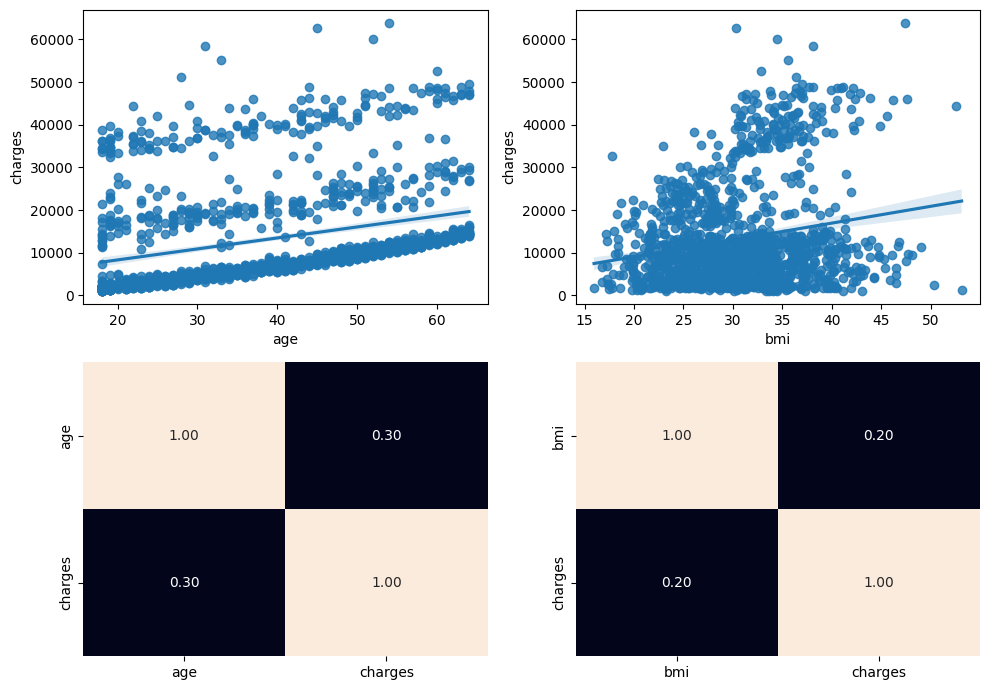

In [33]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = total_data, x = "age", y = "charges")
sns.heatmap(total_data[["age", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_data, x = "bmi", y = "charges")
sns.heatmap(total_data[["bmi", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

For the age there seem to be three clear clusters that look like lines, possibly meaning that this variable, combined with another one (most likely a categorigal one) is a very good predictor.

The BMI also seems to indicate a tendency towards the lower end of the charges variable, although it still has some considerable scattering.

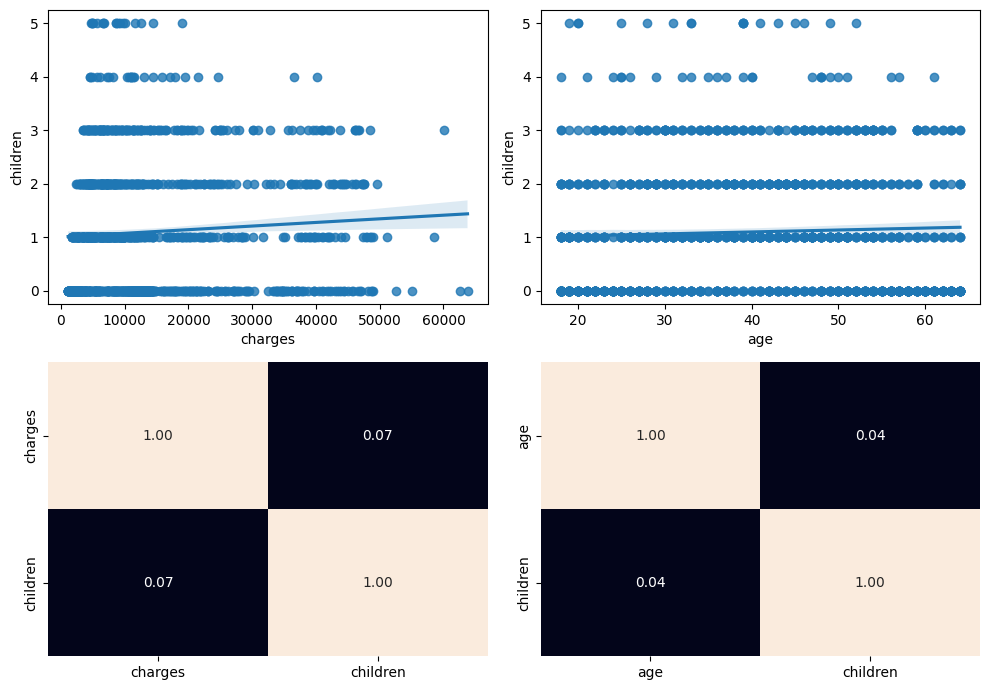

In [34]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = total_data, x = "charges", y = "children")
sns.heatmap(total_data[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_data, x = "age", y = "children")
sns.heatmap(total_data[["age", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

None of the evaluated variables seem to be strongly correlated.

#### 3.2 Categorical-categorical
Let's have a look on categorical variables and see what we can find out.

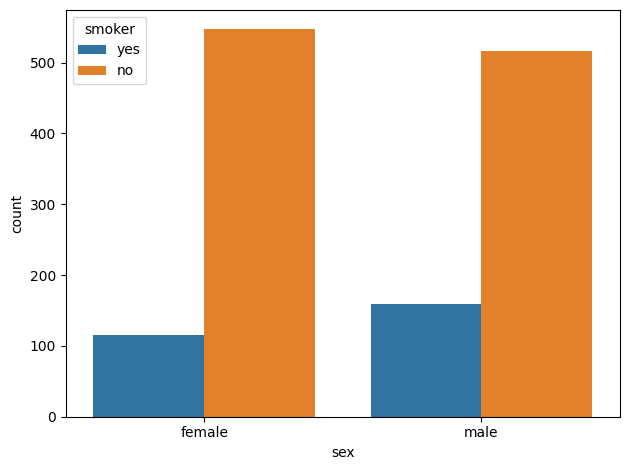

In [35]:
sns.countplot(data = total_data, x = "sex", hue = "smoker")

plt.tight_layout()

plt.show()

<Axes: xlabel='smoker', ylabel='count'>

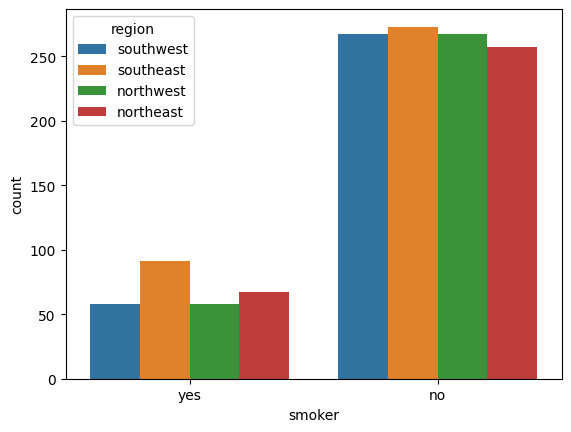

In [36]:
sns.countplot(data = total_data, x = "smoker", hue = "region")

In short, there seem to be more male smokers than females and there seem to be more smokers in the southeast than anywhere else.

#### 3.3 Categorical-numerical
Let's see how categorical variables relate with the numerical ones.

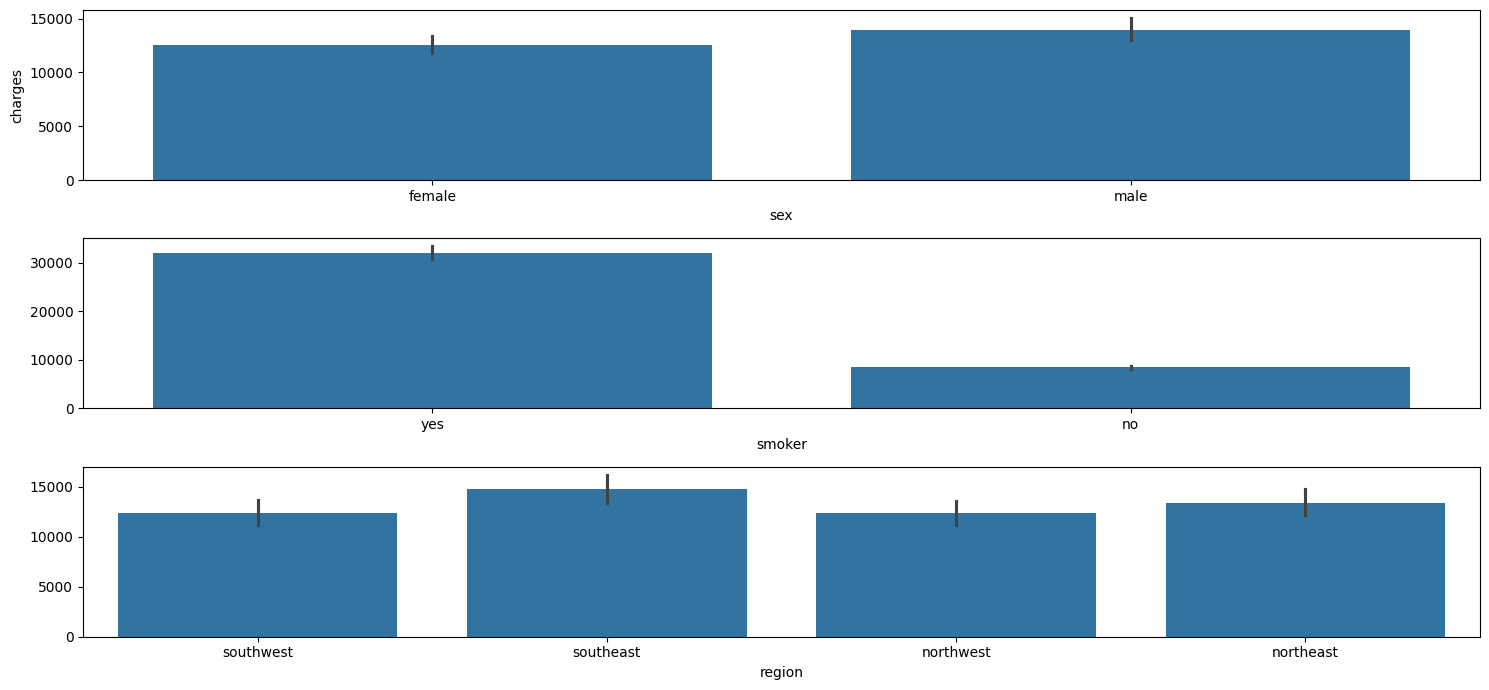

In [37]:
fig, axis = plt.subplots(3, figsize = (15, 7))

sns.barplot(ax = axis[0], data = total_data, x = "sex", y = total_data["charges"])
sns.barplot(ax = axis[1], data = total_data, x = "smoker", y = total_data["charges"]).set(ylabel = None)
sns.barplot(ax = axis[2], data = total_data, x = "region", y = total_data["charges"]).set(ylabel = None)

plt.tight_layout()

plt.show()

It seems that, on average, males are charged more than females and smokers are understandably charged more than non-smokers.

This is also reflected in the fact that the southeast, where there are more smokers, the average charges are higher.

#### 3.4 Correlation analysis

Let's take a look at how each variable correlates wih each other whenever it makes sense:

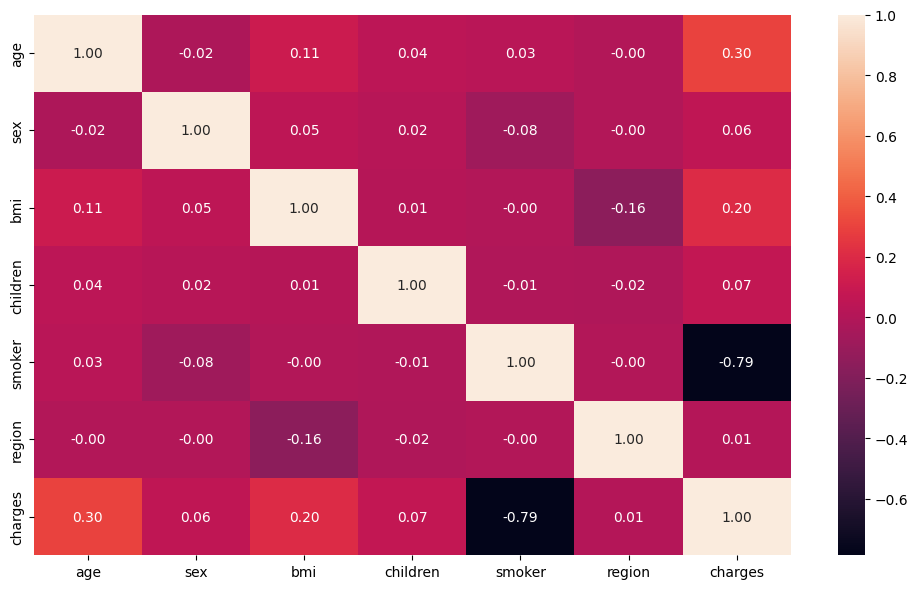

In [38]:
total_data_factorised = total_data
total_data_factorised["sex"] = pd.factorize(total_data["sex"])[0]
total_data_factorised["smoker"] = pd.factorize(total_data["smoker"])[0]
total_data_factorised["region"] = pd.factorize(total_data["region"])[0]
total_data_factorised.to_csv("../data/interim/factorised_eda_results.csv", index=False)

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data_factorised.corr(), annot = True, fmt = ".2f")

plt.tight_layout()


plt.show()

As suspected the most related variables are age, bmi and smoker. As there seems to be a degree of correlation between all columns, let's not remove any of them. 